## 1. Préparation des données

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
from scipy.linalg import svd
import matplotlib.pyplot as plt

# Chargement des données
data = pd.read_csv('resultats_presidentielles_2012.csv')
regions = data['Region']
candidats = data.columns[1:]
X = data.iloc[:, 1:].values

# Calcul des fréquences
N = X.sum()
F = X / N

# Profils lignes et colonnes - VERSION CORRIGÉE
profils_lignes = X / X.sum(axis=1, keepdims=True)
profils_colonnes = X / X.sum(axis=0, keepdims=True)  # Correction ici

# Fréquences marginales
f_i = X.sum(axis=1) / N
f_j = X.sum(axis=0) / N

# Affichage pour vérification
print("Dimensions des profils lignes:", profils_lignes.shape)
print("Dimensions des profils colonnes:", profils_colonnes.shape)
print("Somme des profils colonnes par colonne:", profils_colonnes.sum(axis=0))  # Doit être 1 pour chaque colonne

Dimensions des profils lignes: (23, 11)
Dimensions des profils colonnes: (23, 11)
Somme des profils colonnes par colonne: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## 2. Matrice des taux de liaison

In [6]:
# Calcul de la matrice des taux de liaison
T = (F - np.outer(f_i, f_j)) / np.outer(f_i, f_j)

# Création d'un DataFrame pour une meilleure visualisation
taux_liaison = pd.DataFrame(T, index=regions, columns=candidats)
print("Matrice des taux de liaison:")
print(taux_liaison.round(3))

Matrice des taux de liaison:
            Hollande  Sarkozy  Le_Pen  Bayrou  Melenchon   Joly  \
Region                                                            
Alsace        -0.302    0.237   0.126   0.261     -0.334  0.220   
Aquitaine      0.124   -0.084  -0.211   0.154      0.107  0.050   
Auvergne       0.109   -0.121  -0.133   0.072      0.162 -0.168   
Bourgogne      0.012    0.001   0.036  -0.060     -0.056 -0.190   
Bretagne       0.150   -0.034  -0.325   0.225      0.006  0.316   
Centre        -0.037    0.048  -0.014   0.021     -0.042 -0.190   
Champ-Ard     -0.103    0.075   0.221  -0.073     -0.213 -0.373   
Corse         -0.121    0.182   0.244  -0.460     -0.100  0.044   
Fr-Comte      -0.066   -0.001   0.082  -0.062      0.009 -0.042   
Ile-de-Fr      0.152    0.095  -0.372  -0.004      0.084  0.208   
Lang-Rouss    -0.046   -0.068   0.197  -0.267      0.202  0.020   
Limousin       0.371   -0.219  -0.221  -0.180      0.166 -0.268   
Lorraine      -0.078   -0.046   0

## 3. Décomposition en valeurs singulières (SVD)  
  Les valeurs  propres  et les vecteurs propres pour les nuages  profils lignes et profils colonnes en appliquant la SVD  sur  la matrice de travail W

In [7]:
# Matrice de travail W
W = (F - np.outer(f_i, f_j)) / np.sqrt(np.outer(f_i, f_j))

# SVD
U, s, Vt = svd(W, full_matrices=False)
S = np.diag(s)
V = Vt.T

# Valeurs propres
valeurs_propres = s**2
print("\nValeurs propres:")
print(pd.DataFrame({
    'Valeur propre': valeurs_propres,
    '% inertie': 100 * valeurs_propres / valeurs_propres.sum(),
    '% inertie cumulé': 100 * np.cumsum(valeurs_propres) / valeurs_propres.sum()
}).round(5))


Valeurs propres:
    Valeur propre  % inertie  % inertie cumulé
0         0.03052   62.11669          62.11669
1         0.01058   21.53960          83.65629
2         0.00487    9.90921          93.56549
3         0.00147    2.99842          96.56392
4         0.00107    2.16890          98.73282
5         0.00035    0.70747          99.44029
6         0.00014    0.29449          99.73478
7         0.00009    0.18195          99.91673
8         0.00004    0.07397          99.99070
9         0.00000    0.00930         100.00000
10        0.00000    0.00000         100.00000


## 4. Coordonnées factorielles
Calculons les coordonnées pour les profils lignes et colonnes :

In [8]:
# Coordonnées des profils lignes
coord_lignes = U @ S

# Coordonnées des profils colonnes
coord_colonnes = V @ S

# Création de DataFrames pour les coordonnées
df_coord_lignes = pd.DataFrame(coord_lignes[:, :4], 
                              index=regions, 
                              columns=[f'F{i+1}' for i in range(4)])

df_coord_colonnes = pd.DataFrame(coord_colonnes[:, :4], 
                                index=candidats, 
                                columns=[f'F{i+1}' for i in range(4)])

print("\nCoordonnées des régions sur les 4 premiers axes:")
print(df_coord_lignes.round(4))

print("\nCoordonnées des candidats sur les 4 premiers axes:")
print(df_coord_colonnes.round(4))


Coordonnées des régions sur les 4 premiers axes:
                F1      F2      F3      F4
Region                                    
Alsace     -0.0175 -0.0151  0.0335  0.0015
Aquitaine   0.0172  0.0252 -0.0031 -0.0080
Auvergne    0.0074  0.0128 -0.0082 -0.0066
Bourgogne  -0.0020 -0.0020 -0.0030  0.0020
Bretagne    0.0264  0.0319  0.0098 -0.0029
Centre     -0.0002 -0.0030  0.0045 -0.0012
Champ-Ard  -0.0138 -0.0119  0.0016  0.0046
Corse      -0.0027 -0.0127 -0.0013  0.0049
Fr-Comte   -0.0040 -0.0056 -0.0011 -0.0032
Ile-de-Fr   0.0671  0.0253  0.0131  0.0140
Lang-Rouss -0.0078 -0.0170 -0.0194 -0.0064
Limousin    0.0138  0.0159 -0.0197  0.0031
Lorraine   -0.0179 -0.0078 -0.0047 -0.0045
Midi-Pyr    0.0178  0.0211 -0.0135 -0.0077
Nord-PdC   -0.0118 -0.0103 -0.0308 -0.0043
Basse-Nor   0.0049  0.0047  0.0090 -0.0011
Haute-Nor   0.0018 -0.0046 -0.0099 -0.0048
Pays-Loire  0.0356 -0.0111  0.0002  0.0187
Picardie   -0.0166 -0.0133 -0.0149  0.0000
Poit-Char   0.0209  0.0181  0.0004 -0.0015
PACA

## 5. Contributions et qualités de représentation
Calculons les contributions et qualités :

In [16]:
# Contributions des lignes
contrib_lignes = (f_i.reshape(-1,1) * (coord_lignes**2)) / valeurs_propres

# Qualités des lignes
qualites_lignes = (coord_lignes**2) / np.sum(coord_lignes**2, axis=1, keepdims=True)

# Contributions des colonnes
contrib_colonnes = (f_j.reshape(-1,1) * (coord_colonnes**2) )/ valeurs_propres

# Qualités des colonnes
qualites_colonnes = (coord_colonnes**2) / np.sum(coord_colonnes**2, axis=1, keepdims=True)

# Création de DataFrames
df_contrib_lignes = pd.DataFrame(contrib_lignes[:, :4], 
                               index=regions, 
                               columns=[f'F{i+1}' for i in range(4)])

df_qualites_lignes = pd.DataFrame(qualites_lignes[:, :4], 
                                index=regions, 
                                columns=[f'F{i+1}' for i in range(4)])

df_contrib_colonnes = pd.DataFrame(contrib_colonnes[:, :4], 
                                 index=candidats, 
                                 columns=[f'F{i+1}' for i in range(4)])

df_qualites_colonnes = pd.DataFrame(qualites_colonnes[:, :4], 
                                  index=candidats, 
                                  columns=[f'F{i+1}' for i in range(4)])

print("\nContributions des régions:")
print(df_contrib_lignes.round(4))

print("\nQualités de représentation des régions:")
print(df_qualites_lignes.round(4))

print("\nContributions des candidats:")
print(df_contrib_colonnes.round(4))

print("\nQualités de représentation des candidats:")
print(df_qualites_colonnes.round(4))


Contributions des régions:
                F1      F2      F3      F4
Region                                    
Alsace      0.0003  0.0006  0.0063  0.0000
Aquitaine   0.0005  0.0032  0.0001  0.0023
Auvergne    0.0000  0.0004  0.0003  0.0007
Bourgogne   0.0000  0.0000  0.0000  0.0001
Bretagne    0.0013  0.0053  0.0011  0.0003
Centre      0.0000  0.0000  0.0002  0.0000
Champ-Ard   0.0001  0.0003  0.0000  0.0003
Corse       0.0000  0.0001  0.0000  0.0001
Fr-Comte    0.0000  0.0001  0.0000  0.0001
Ile-de-Fr   0.0217  0.0089  0.0052  0.0197
Lang-Rouss  0.0001  0.0012  0.0033  0.0012
Limousin    0.0001  0.0003  0.0010  0.0001
Lorraine    0.0004  0.0002  0.0002  0.0005
Midi-Pyr    0.0005  0.0020  0.0018  0.0019
Nord-PdC    0.0003  0.0006  0.0120  0.0008
Basse-Nor   0.0000  0.0001  0.0004  0.0000
Haute-Nor   0.0000  0.0001  0.0006  0.0004
Pays-Loire  0.0023  0.0006  0.0000  0.0132
Picardie    0.0003  0.0005  0.0013  0.0000
Poit-Char   0.0004  0.0009  0.0000  0.0000
PACA        0.0002  0.0260

## 6. Visualisation des résultats

<Figure size 1200x1000 with 0 Axes>

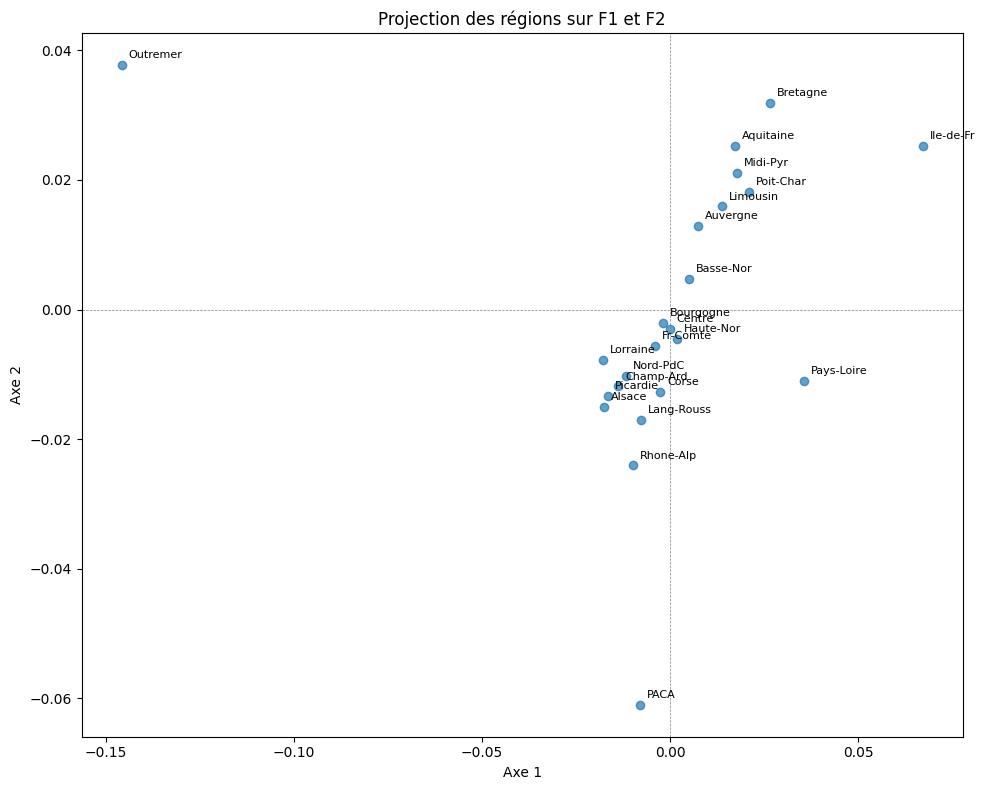

<Figure size 1200x1000 with 0 Axes>

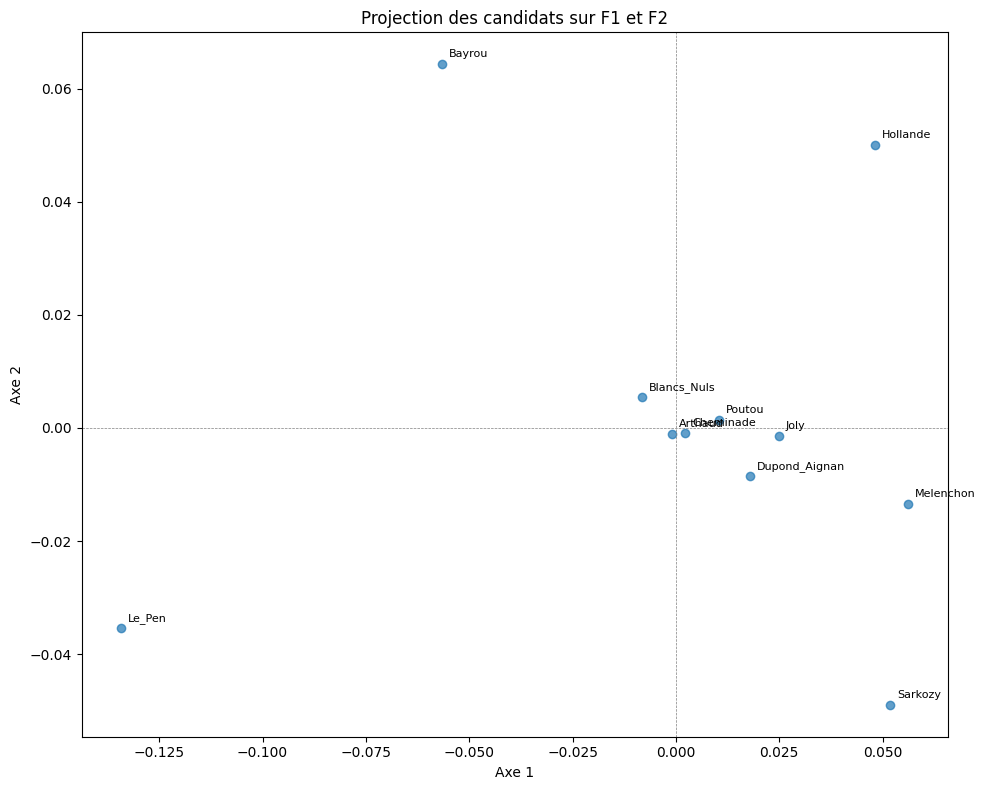

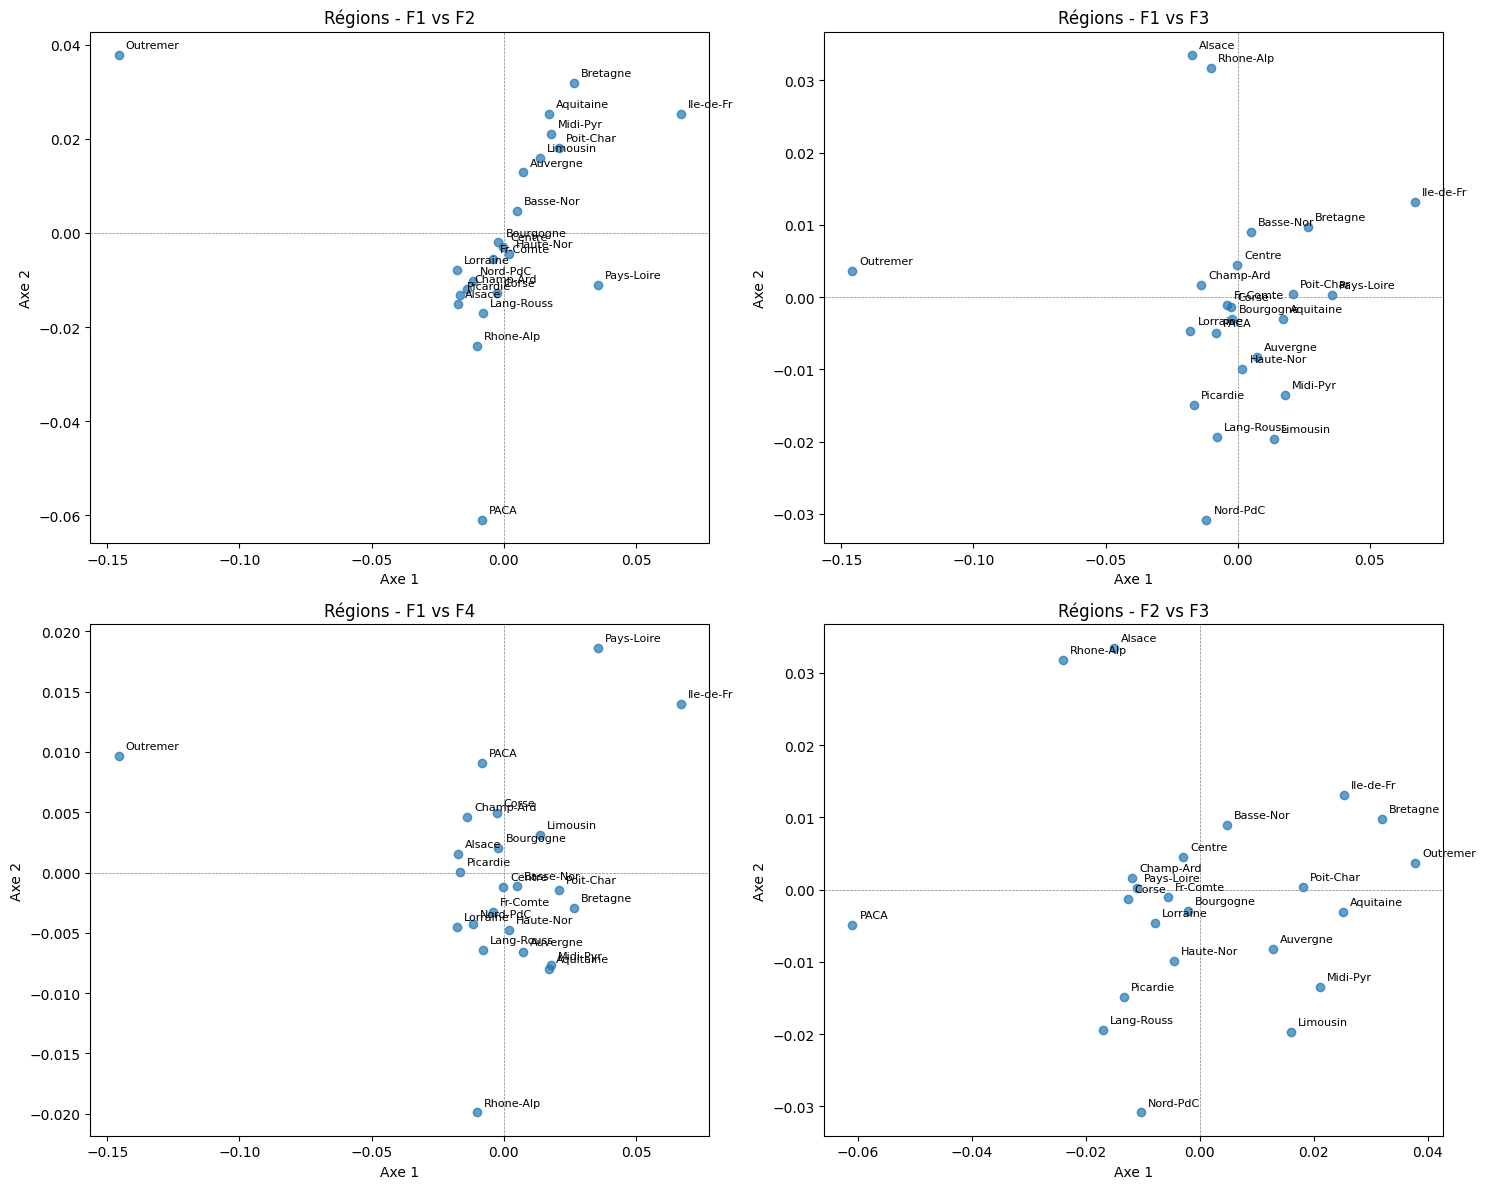

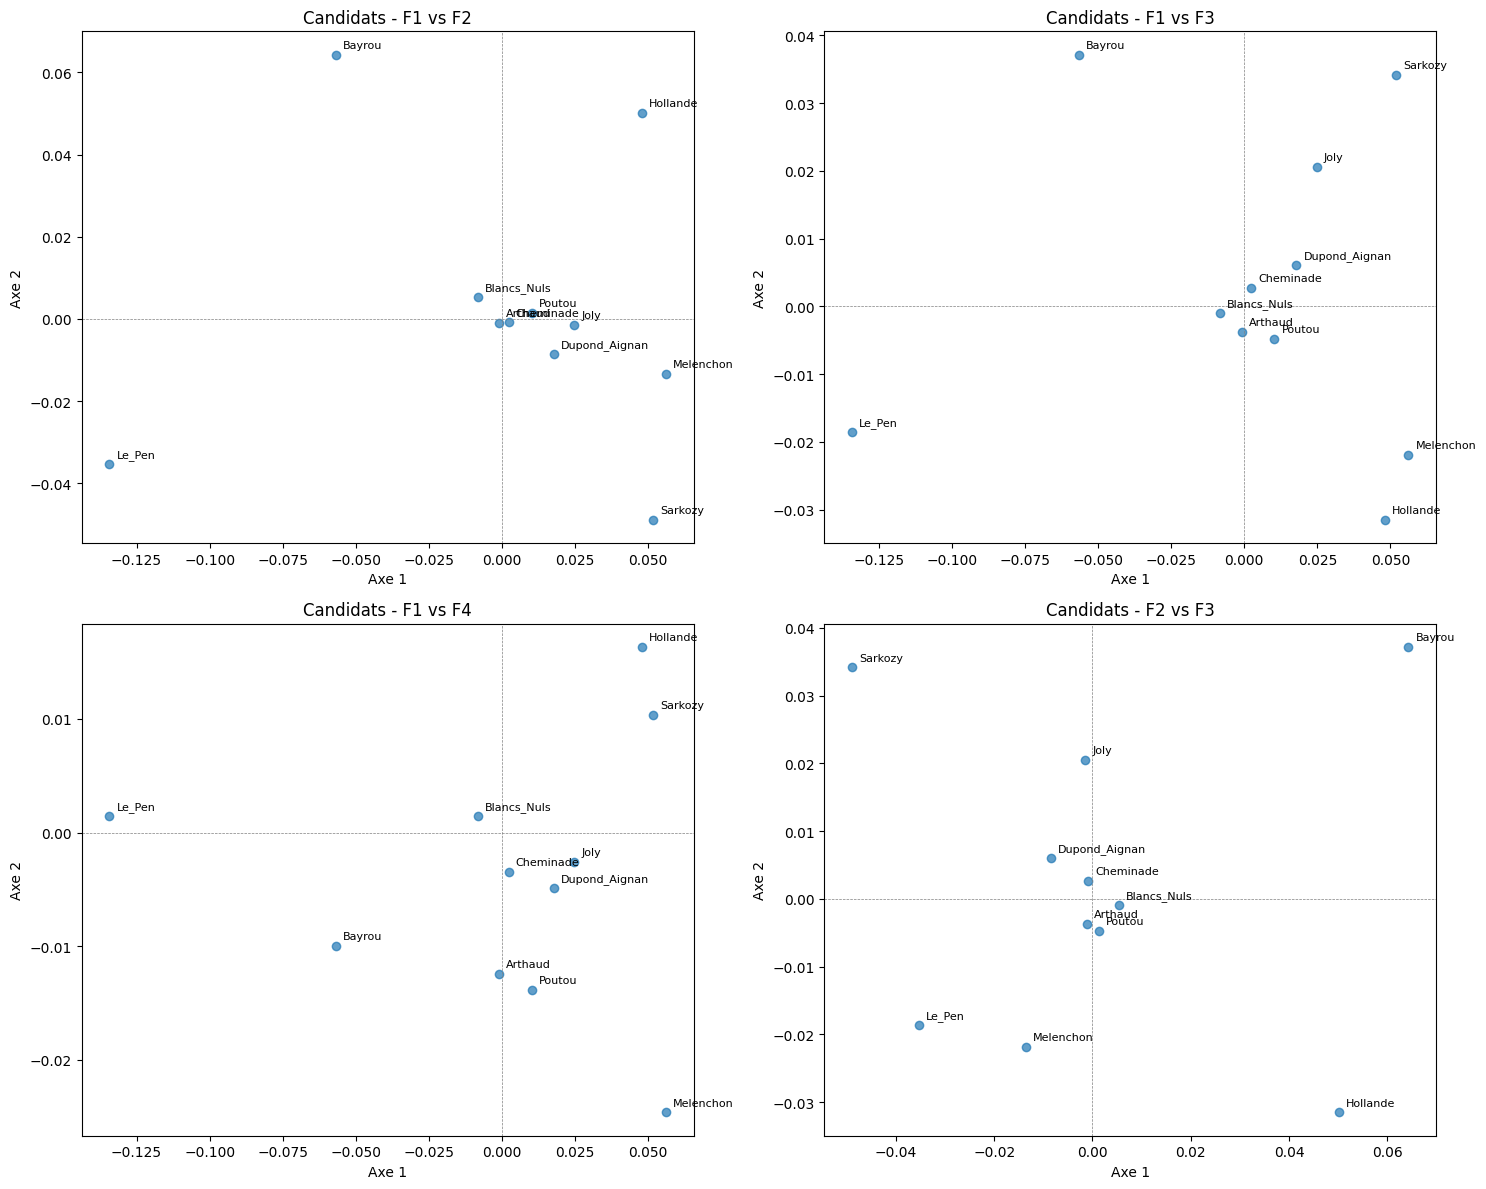

In [17]:
# Fonction pour tracer les projections
def plot_projection(coords, labels, title, contributions=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))
    
    ax.scatter(coords[:, 0], coords[:, 1], alpha=0.7)
    
    # Ajout des labels avec un décalage
    for i, (x, y) in enumerate(coords[:, :2]):
        ax.annotate(labels[i], (x, y), xytext=(5, 5), 
                    textcoords='offset points', fontsize=8)
    
    ax.axhline(0, color='gray', linestyle='--', linewidth=0.5)
    ax.axvline(0, color='gray', linestyle='--', linewidth=0.5)
    ax.set_title(title)
    ax.set_xlabel('Axe 1')
    ax.set_ylabel('Axe 2')
    
    return ax

# Projections des régions
plt.figure(figsize=(12, 10))
plot_projection(coord_lignes[:, :2], regions, 'Projection des régions sur F1 et F2')
plt.tight_layout()
plt.show()

# Projections des candidats
plt.figure(figsize=(12, 10))
plot_projection(coord_colonnes[:, :2], candidats, 'Projection des candidats sur F1 et F2')
plt.tight_layout()
plt.show()

# Graphiques pour les autres axes
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
plot_projection(coord_lignes[:, [0,1]], regions, 'Régions - F1 vs F2', ax=axes[0,0])
plot_projection(coord_lignes[:, [0,2]], regions, 'Régions - F1 vs F3', ax=axes[0,1])
plot_projection(coord_lignes[:, [0,3]], regions, 'Régions - F1 vs F4', ax=axes[1,0])
plot_projection(coord_lignes[:, [1,2]], regions, 'Régions - F2 vs F3', ax=axes[1,1])
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
plot_projection(coord_colonnes[:, [0,1]], candidats, 'Candidats - F1 vs F2', ax=axes[0,0])
plot_projection(coord_colonnes[:, [0,2]], candidats, 'Candidats - F1 vs F3', ax=axes[0,1])
plot_projection(coord_colonnes[:, [0,3]], candidats, 'Candidats - F1 vs F4', ax=axes[1,0])
plot_projection(coord_colonnes[:, [1,2]], candidats, 'Candidats - F2 vs F3', ax=axes[1,1])
plt.tight_layout()
plt.show()